In [1]:
# 1. Імпорт необхідних пакетів
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import zscore

In [2]:
# 2. Завантаження датасету
california_housing = fetch_california_housing(as_frame=True)
data = california_housing.data
target = california_housing.target

In [3]:
# 3.1. Очистка від викидів для певних колонок
columns_to_check = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

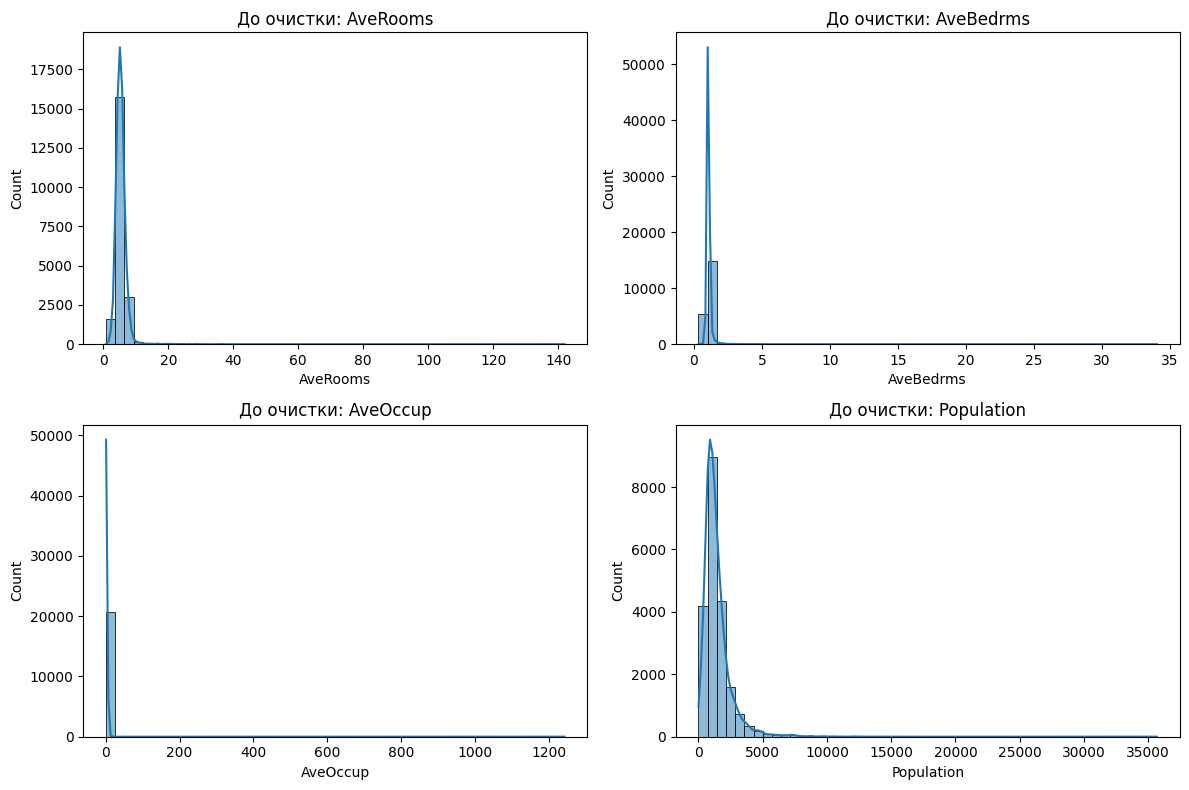

In [4]:
# Візуалізація до очистки
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), columns_to_check):
    sns.histplot(data[col], bins=50, ax=ax, kde=True)
    ax.set_title(f'До очистки: {col}')
plt.tight_layout()
plt.show()

In [5]:
# Z-score метод для видалення викидів
z_scores = data[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
data_clean = data[~outliers].copy()
target_clean = target[~outliers].copy()


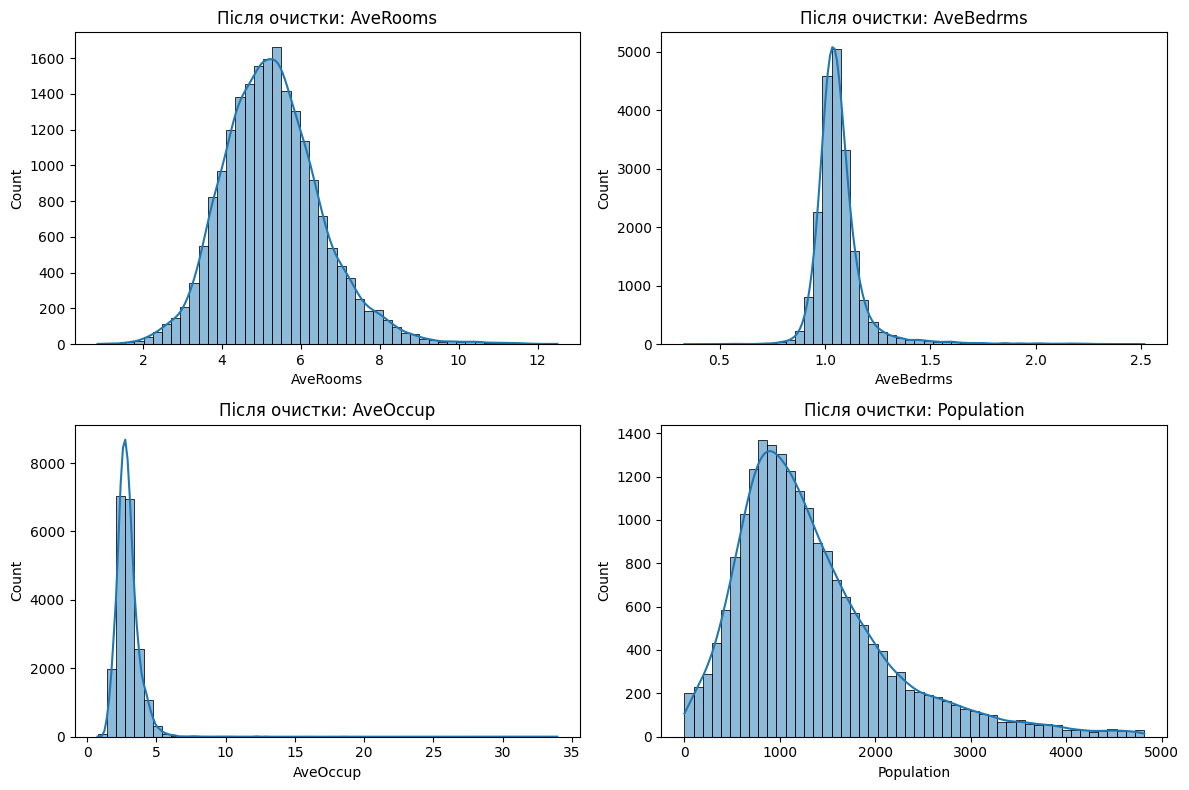

In [6]:
# Візуалізація після очистки
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), columns_to_check):
    sns.histplot(data_clean[col], bins=50, ax=ax, kde=True)
    ax.set_title(f'Після очистки: {col}')
plt.tight_layout()
plt.show()

Очистка спрацювала добре — видно, що після видалення викидів розподіли стали значно ближчими до нормального. Зокрема:

* AveRooms, AveOccup, Population — мають добре обрізані «довгі хвости».

* AveBedrms — тепер щільно сконцентрована, менш розкидана.

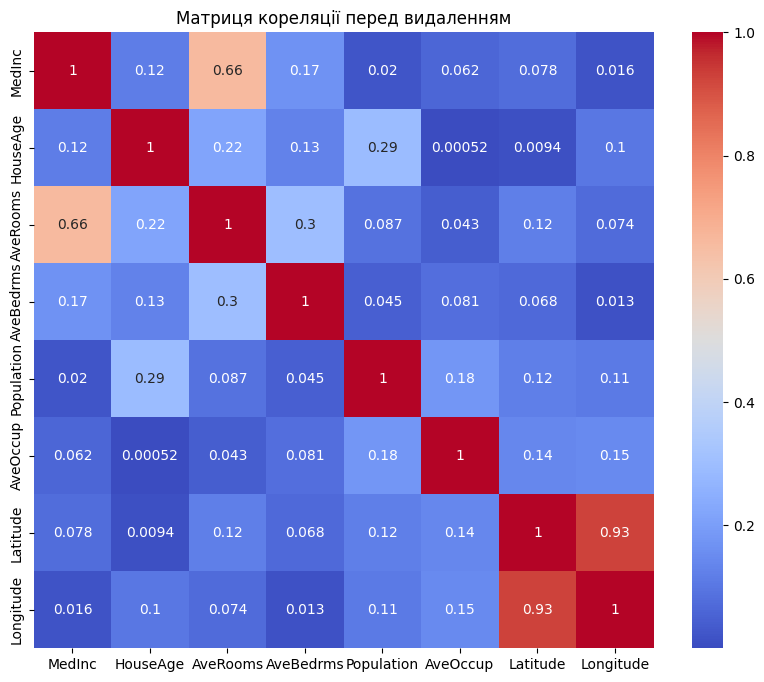

In [7]:
# 3.2. Аналіз кореляцій
plt.figure(figsize=(10, 8))
corr_matrix = data_clean.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції перед видаленням')
plt.show()

In [8]:
# Видалення 'AveBedrms'
data_clean.drop(columns=['AveBedrms'], inplace=True)

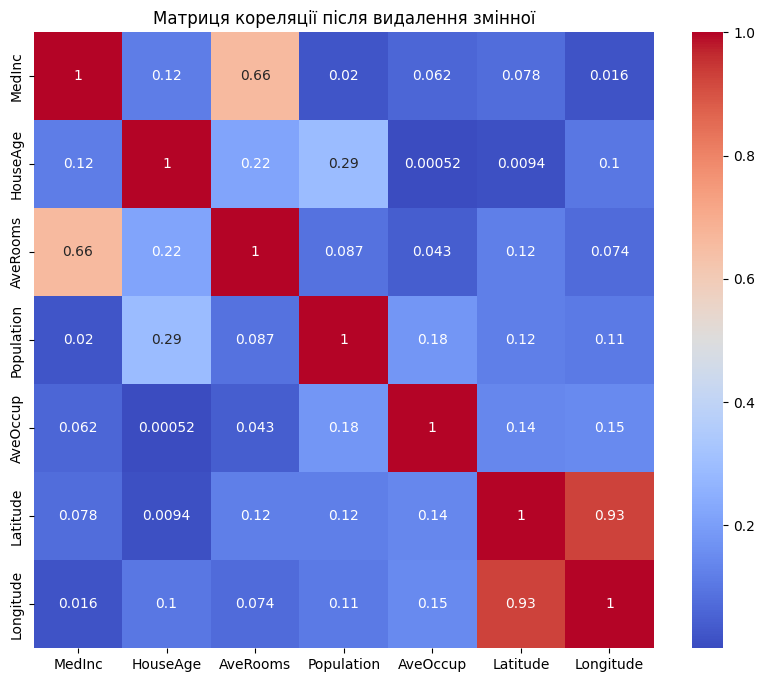

In [9]:
# Повторна візуалізація кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr().abs(), annot=True, cmap='coolwarm')
plt.title('Матриця кореляції після видалення змінної')
plt.show()

In [10]:
# 4. Розділення на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    data_clean, target_clean, test_size=0.2, random_state=42
)

In [11]:
# 5. Нормалізація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# 6. Побудова моделі (лінійна)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [13]:
# 7. Оцінка моделі (лінійної)
r_sq_upd = model.score(X_train_scaled, y_train)
mae_upd = mean_absolute_error(y_test, y_pred)
mape_upd = mean_absolute_percentage_error(y_test, y_pred)

In [14]:
print("Лінійна регресія:")
print(f'R2: {r_sq_upd:.2f} | MAE: {mae_upd:.2f} | MAPE: {mape_upd:.2f}')

Лінійна регресія:
R2: 0.64 | MAE: 0.51 | MAPE: 0.30


In [15]:
# 9. Поліноміальна регресія (степінь 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [16]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

In [17]:
r2_poly = model_poly.score(X_train_poly, y_train)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

In [18]:
print("\nПоліноміальна регресія (степінь 2):")
print(f'R2: {r2_poly:.2f} | MAE: {mae_poly:.2f} | MAPE: {mape_poly:.2f}')


Поліноміальна регресія (степінь 2):
R2: 0.70 | MAE: 0.45 | MAPE: 0.25


Після порівняння результатів двох моделей – лінійної регресії та поліноміальної регресії другого ступеня – можна зробити такі висновки:

Модель поліноміальної регресії показала кращі метрики:

R² зросло з 0.64 до 0.70 (що свідчить про покращене пояснення дисперсії даних моделлю).

MAE зменшилось з 0.51 до 0.45 (тобто середня абсолютна помилка стала меншою).

MAPE зменшилось з 0.30 до 0.25 (що говорить про підвищення точності моделі у відсотковому вираженні).

Покращення склало приблизно 5–6 відсоткових пунктів, що відповідає очікуваному результату, зазначеному в завданні.

Отже, використання поліноміальних ознак (ступінь 2) дозволило моделі краще захопити нелінійні залежності у даних, що призвело до підвищення якості прогнозування.

Поліноміальна регресія є доцільним покращенням у цьому випадку, але варто враховувати можливий ризик перенавчання при подальшому підвищенні ступеня полінома.
